In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import norm, bernoulli

%matplotlib inline
warnings.filterwarnings('ignore')

np.random.seed(42)

In [2]:
y = np.array([-0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53, 0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22])

In [24]:
mu1, mu2 = np.random.choice(y,2)
var1, var2 = np.var(y), np.var(y)
pi = 0.5
log_lik = np.zeros(100)
for i in range(100):
    gamma = pi*norm.pdf(y, mu2, var2**0.5)/((1-pi)*norm.pdf(y, mu1, var1**0.5) + pi*norm.pdf(y, mu2, var2**0.5))
    mu1, var1 = np.sum((1-gamma)*y)/np.sum(1-gamma), np.sum((1-gamma)*((y-mu1)**2))/np.sum(1-gamma)
    mu2, var2 = np.sum(gamma*y)/np.sum(gamma), np.sum(gamma*((y-mu2)**2))/np.sum(gamma)
    pi = np.mean(gamma)
    log_lik[i] = np.sum((1-gamma)*np.log(norm.pdf(y, mu1, var1**0.5)) + gamma*np.log(norm.pdf(y, mu2, var2**0.5))) + np.sum(gamma * np.log(pi) + (1-gamma)*np.log(1-pi))
    if i % 20 == 0:
        print("pi: ", pi)


print("Result: mu1 : %.2f, mu2: %.2f, var1 : %.2f, var2 : %.2f, pi : %.2f"%(mu1, mu2, var1, var2, pi))

pi:  0.545809512111228
pi:  0.5451929737845206
pi:  0.5365698599609343
pi:  0.5460759499892459
pi:  0.5545883939853574
Result: mu1 : 4.66, mu2: 1.08, var1 : 0.82, var2 : 0.81, pi : 0.55


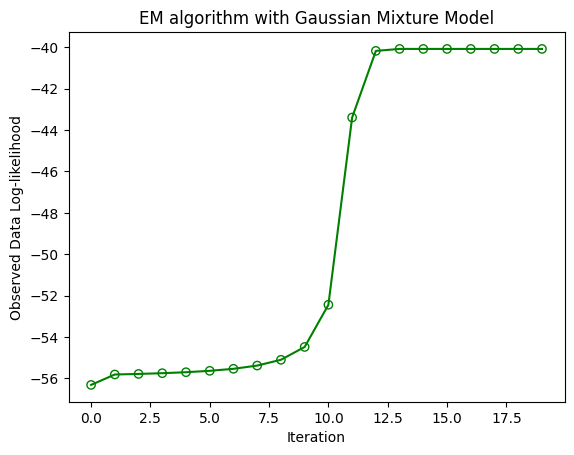

In [41]:
plt.scatter(range(len(log_lik[::5])), log_lik[::5], facecolors='none', edgecolors='green')
plt.plot(range(len(log_lik[::5])), log_lik[::5],color='green')
plt.ylabel("Observed Data Log-likelihood")
plt.xlabel("Iteration")
plt.title("EM algorithm with Gaussian Mixture Model")
plt.show()

array([-56.32237219, -55.81800352, -55.79081727, -55.75527153,
       -55.70750492, -55.64086061, -55.54281335, -55.38685476,
       -55.10659481, -54.48626312, -52.44497955, -43.38935127,
       -40.16701027, -40.07202649, -40.07229171, -40.07250108,
       -40.07252902, -40.07253245, -40.07253287, -40.07253292])

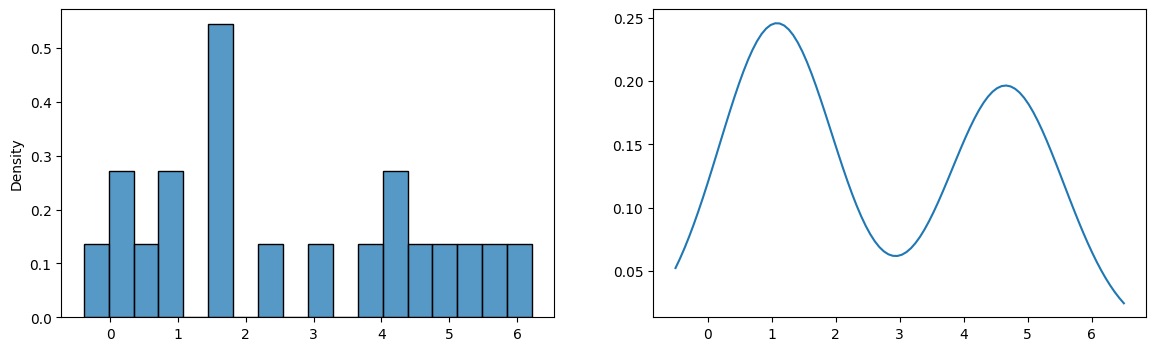

In [25]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(y, bins=18, stat= 'density')

plt.subplot(122)
xx = np.linspace(-0.5, 6.5, 100)
yy = (1-pi)*norm.pdf(xx, mu1, var1**0.5) + pi*norm.pdf(xx, mu2, var2**0.5)
plt.plot(xx, yy)

plt.show()

In [ ]:
mu1, mu2 = np.zeros(200), np.zeros(200)
mu1[0], mu2[0] = np.random.choice(y,2)
delta = np.zeros(len(y))
delta_prop = np.zeros(200)

for t in range(1, 200):
    gamma = pi*norm.pdf(y, mu2[t-1], var2**0.5)/((1-pi)*norm.pdf(y, mu1[t-1], var1**0.5) + pi*norm.pdf(y, mu2[t-1], var2**0.5))

    for i in range(len(y)):
        delta[i] = bernoulli(gamma[i]).rvs(1)

    loc1 = np.sum((1-delta)*y) / np.sum(1-delta)
    loc2 = np.sum(delta*y) / np.sum(delta)

    mu1[t], mu2[t] = norm(loc1, var1 ** 0.5).rvs(1), norm(loc2, var2 ** 0.5).rvs(1)
    delta_prop[t]  = np.sum(delta)


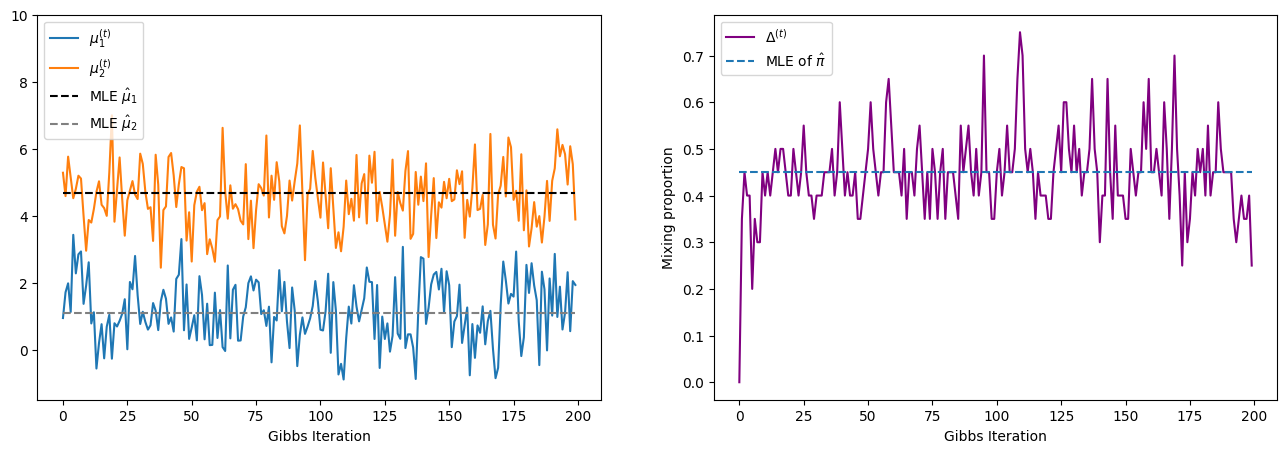

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(mu1, label = r'$\mu_1^{(t)}$')
plt.plot(mu2, label= r'$\mu_2^{(t)}$')

plt.hlines(4.66,0,199, linestyle='dashed', color='black', label= r'MLE $\hat{\mu}_1$')
plt.hlines(1.08,0,199, linestyle='dashed', color='gray', label = r'MLE $\hat{\mu}_2$')

plt.xlabel("Gibbs Iteration")

plt.ylim(-1.5,10)
plt.legend()

plt.subplot(122)
plt.plot(delta_prop / len(y), color='purple', label=r'$\Delta^{(t)}$')
plt.hlines(0.45, 0, 199, linestyle='dashed', label = r'MLE of $\hat{\pi}$')
plt.ylabel("Mixing proportion")
plt.xlabel("Gibbs Iteration")

plt.legend()
plt.show()